In [0]:
import pyspark.sql.functions as F

### Quais categorias possuem produtos com a maior variação de preço (amplitude)?

In [0]:
%sql
SELECT category, product_count, price_amplitude
FROM mvp.gold_price_analysis.category_price_variability
ORDER BY price_amplitude DESC
LIMIT 10;

category,product_count,price_amplitude
feminino,19,7200.0
mochila,2779,6676.3099999999995
calça,54753,5978.07
carteira,1810,5432.09
outros,12693,5108.9
monitor cardiaco,16,5000.0
vestido,42433,4985.0
jaqueta,9901,4960.0
óculos,5075,4879.34
bota,31462,4662.31


Aqui conseuimos ver as diferenças de produtos de "luxo" se manifestando, o que torna a análise mais interessante. Vemos ítens como `óculos` com amplitudo de aproximadamente R$4800. Já categorias mais genéricas como `feminino`, com variações tão altas, são uma consequência da falta de uma categorização mais específica e padronizada, isso se confirma ao vermos qe há apenas 19 produtos nessa categoria, uma vez que as categorias vêm diretamente do vendedores, a forma de categorizar é diferente, o que nos leva a categorias muito mistas e pouco compreensíveis. Um ponto a considerar: de certa forma, eu esperaria que categorias com muitos produtos tivessem um intervalo de preço maior, mas me surpreende que categorias com poucos produtos tenham um intervalo de preço tão grande e não seja erro de categoriação (como `monitor cardiáco`)

### Quais categorias possuem produtos com a menor variação de preço?

In [0]:
%sql
SELECT category, product_count, price_amplitude
FROM mvp.gold_price_analysis.category_price_variability
ORDER BY price_amplitude ASC
LIMIT 10;

category,product_count,price_amplitude
hipercalóricos,2,0.0
óculos de bike,1,0.0
frigideiras grills,1,0.0
bélgica,1,0.0
cremeiras,1,0.0
copos e taças,2,0.0
macaquinho/jardineira,4,0.0
marketplace,1,0.0
panelas de pressão elétricas,2,0.0
isolante,1,0.0


Mais uma vez o problema da categorização ruim, vemos categorias com apenas um produto. Vamos filtrar para categorias com mais de 100 produtos.

In [0]:
%sql
SELECT category, product_count, price_amplitude
FROM mvp.gold_price_analysis.category_price_variability
WHERE
product_count > 100
ORDER BY price_amplitude ASC
LIMIT 10;

category,product_count,price_amplitude
lápis,112,40.0
sungas,460,47.0
acessórios de cabelo,131,57.99999999999999
meiões,121,69.0
corretivo,210,72.0
blusas de proteção,161,80.0
pó facial,178,80.0
brincos,107,84.0
máscara de cílios,117,84.0
cintos,429,90.0


Aqui parece um pouco mais realista, temos categorias com ~100 a 400 produtos, e variações de preços menores que R$100, parece razoável que onde há poucos produtos eles tenham um comportamento de competirem entre si.

### Quais categorias possuem produtos mais caros (média)?

In [0]:
%sql
SELECT category, total_products, average_category_price
FROM mvp.gold_price_analysis.merchant_category_segmentation
ORDER BY average_category_price DESC
LIMIT 10;

category,total_products,average_category_price
feminino,19,3823.6315789473683
perifericos,1,2299.99
malas,126,2048.3650793650795
fone,2,1674.99
óculos de bike,1,1559.99
adegas e cervejeiras,3,1533.3233333333335
masculino,54,1470.888888888889
adegas com compressor,1,1299.99
monitor cardiaco,16,1233.1150000000007
snkrs,107,1219.1488785046752


As categorias feminino possuem os produtos mais caros em média, novamente sugeringo um erro, já que a categoria é bem pequena, e se refletisse a realidade, teríamos produtos femininos (roupas, maquiagem, etc) de preços baixos que puxariam a média pra baixo. 

Novamente ver categorias como fone contendo apenas dois produtos sugere a categorização precisava ser melhorada.


### Quais categorias possuem produtos mais baratos (média)?

In [0]:
%sql
SELECT category, total_products, average_category_price
FROM mvp.gold_price_analysis.merchant_category_segmentation
ORDER BY average_category_price ASC
LIMIT 10;

category,total_products,average_category_price
moda feminina,6,6.656666666666667
bebida,4,8.99
cadarço,6,10.823333333333332
unhas,61,14.85590163934427
dosadores,2,14.989999999999998
tapetes e sacos higiênicos,1,15.99
coletes,3,19.9
garfos para churrasco,1,19.99
protecao nariz,1,19.99
bumeran freesbee,1,19.99


A categoria `feminina`possui os produtos mais caros, porém a categoria `moda feminina` que é uma redundância num feed voltado para moda, é a mais barata. isso é muito contraditório, relevanto mais uma vez problemas nos dados. Qque precisam de melhor catergorização.

### Volume de Produtos por Segmento (Luxo/Barato)
#### Quais categorias possuem mais produtos classificados como "luxo" (acima do P90)?

In [0]:
%sql
SELECT category, lux_count, lux_percentage
FROM mvp.gold_price_analysis.category_price_classification
ORDER BY lux_count DESC
LIMIT 10;

category,lux_count,lux_percentage
tênis,26438,24.380077645908834
tênis performance,11274,29.385393316999426
vestido,6116,14.413310395211273
calça,6103,11.146421200664804
jaqueta,3604,36.4003635996364
óculos,3544,69.83251231527093
camisa,3420,23.021001615508887
bolsa,3273,45.667643365424865
sandália,3157,5.435699650476076
top manga curta,2908,2.6978884476936207


Não é surpreendente que roupas sejam o foco da categoria de luxo, porém chama atenção uma categoria `tẽnis performance` que deveria estar dentro da categoria tênis.

#### Quais categorias possuem mais produtos classificados como "baratos" (abaixo da mediana)?

In [0]:
%sql
SELECT category, cheap_count, cheap_percentage
FROM mvp.gold_price_analysis.category_price_classification
ORDER BY cheap_count DESC
LIMIT 10;

category,cheap_count,cheap_percentage
top manga curta,60949,56.54525550154006
blusas,58631,89.11298902635498
roupas,52025,71.35607401006735
tênis,27966,25.789138794367446
sandália,27075,46.617538180753805
calça,20722,37.84632805508374
shorts/bermuda,16688,48.59072909387375
chinelo,16049,65.22392912297813
vestido,12808,30.18405486296043
conjunto curto,12316,72.58796487298874


Como pode ser visto na análise de limpeza dos dados, `top manga curta` é uma das maiores categorias, faz sentido que possua os preços mais baratos atraindo os consumidos que se preocupam menos com exclusividade.

### Auditoria de Qualidade (Discrepância de Preço)
#### Diferença média entre display_price e search_price (Maiores e Menores discrepâncias).

In [0]:
%sql
-- Categorias com a maior diferença positiva (Display Price > Search Price)
SELECT category, average_price_difference, max_difference
FROM mvp.gold_price_analysis.price_discrepancy_audit
ORDER BY average_price_difference DESC
LIMIT 10;

category,average_price_difference,max_difference
descansos de panela,0.0,0.0
pulseiras,0.0,0.0
shorts/bermuda,0.0,0.0
criciúma,0.0,0.0
macaquinho/jardineira,0.0,0.0
abajures de mesa,0.0,0.0
guarani,0.0,0.0
móveis,0.0,0.0
bolas,0.0,0.0
cafeteiras manuais e chaleiras,0.0,0.0


In [0]:
%sql
-- Categorias onde a diferença é mínima ou negativa
SELECT category, average_price_difference, min_difference
FROM mvp.gold_price_analysis.price_discrepancy_audit
ORDER BY average_price_difference ASC
LIMIT 10;

category,average_price_difference,min_difference
descansos de panela,0.0,0.0
pulseiras,0.0,0.0
shorts/bermuda,0.0,0.0
criciúma,0.0,0.0
macaquinho/jardineira,0.0,0.0
abajures de mesa,0.0,0.0
guarani,0.0,0.0
móveis,0.0,0.0
bolas,0.0,0.0
cafeteiras manuais e chaleiras,0.0,0.0


Com essas duas queries meu objetivo era identificar se havia casos em que a loja apresentava preços de busca menores (em sites de busca como google, brave search ou bing), mas preços maioires no site, ou seja, `search_price < display_price`, o contrário não era muito esperado (preço da loja maior que o preço da busca), mas poderia ser um erro. Vemos entrão que o `search_price` e o `display_price` são os mesmos, sugerindo que a coluna `display_price` poderia ter sido removida.

In [0]:
### Listagens de Produtos e Entidades por Segmento
#### Quais produtos estão nas categorias cheap, medium e lux?

In [0]:
%sql
SELECT product_name, category, search_price, price_segment
FROM mvp.gold_price_analysis.product_price_segmentation
ORDER BY search_price DESC
LIMIT 10;

product_name,category,search_price,price_segment
Jaqueta Diesel L-Hung,feminino,8495.0,Lux
Mala de Viagem Victorinox Spectra 3.0 Trunk Grande Storm,mochila,6699.9,Lux
Mala De Viagem Victorinox Spectra 3.0 Grande Preto,mochila,6599.9,Lux
Mala De Viagem Travel Logo Pequena 35T9gtfu1b150,mochila,6535.0,Lux
Mala De Viagem Victorinox Spectra 3.0 Grande Vermelho,mochila,6499.9,Lux
Mala de Viagem Victorinox Spectra 3.0 Exp Grande Storm,mochila,6499.9,Lux
Mala de Viagem Victorinox Spectra 3.0 Expansível Média Storm,mochila,6199.9,Lux
Mala De Viagem Victorinox Spectra 3.0 Média Vermelho,mochila,6099.9,Lux
Calça De Couro Reta Lança Perfume,calça,5993.0,Lux
Calça De Couro Reta Lança Perfume,calça,5993.0,Lux


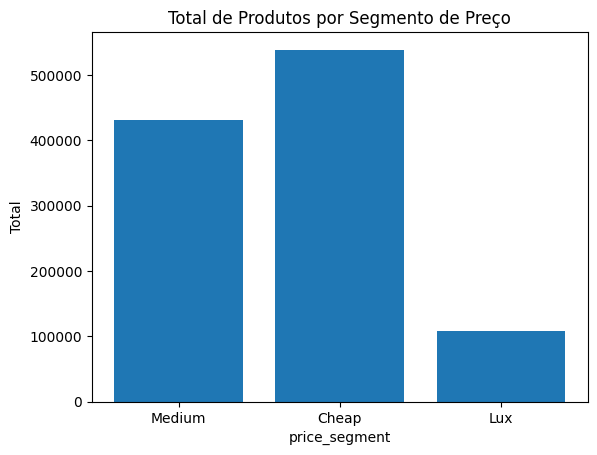

In [0]:
import matplotlib.pyplot as plt

segment_counts = _sqldf.groupBy("price_segment").count().toPandas()
plt.bar(segment_counts["price_segment"], segment_counts["count"])
plt.xlabel("price_segment")
plt.ylabel("Total")
plt.title("Total de Produtos por Segmento de Preço")
plt.show()

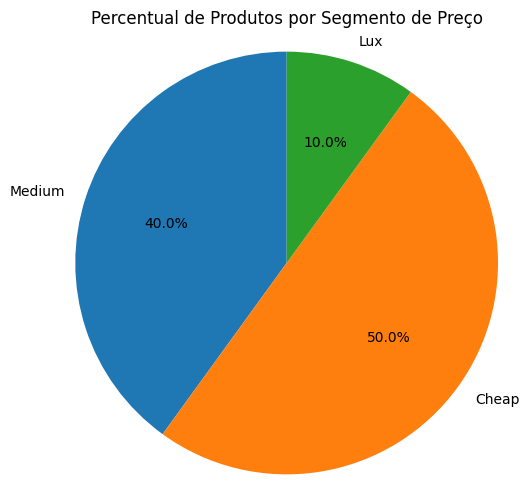

In [0]:
import matplotlib.pyplot as plt

segment_counts = _sqldf.groupBy("price_segment").count().toPandas()
segment_counts["percent"] = segment_counts["count"] / segment_counts["count"].sum() * 100

plt.figure(figsize=(6,6))
plt.pie(segment_counts["count"], labels=segment_counts["price_segment"], autopct='%1.1f%%', startangle=90)
plt.title("Percentual de Produtos por Segmento de Preço")
plt.axis('equal')
plt.show()

Como esperado, as proporções são mantidas (50% cheap, 10% lux e 40% medium), a tendência aplicada em cada categoria seguiu para o dataset completo. Essa pergunta serve apenas para comprovar o funcionamento da cateogrização. Tenho particular interesse nesses dados microdados, pois eles são a causa de eu desenvolver esse tranbalho, me permitindo isolar produtos populares e de luxo.

### Quais marcas (brands) estão nas categorias cheap, medium, lux?

In [0]:
%sql
SELECT brand_name, average_brand_price, brand_segment
FROM mvp.gold_price_analysis.brand_price_segmentation
ORDER BY brand_name
LIMIT 10;

brand_name,average_brand_price,brand_segment
+mu,8.823333333333334,Cheap
...lost,183.61466101694907,Medium
2296,219.36313432835803,Medium
2rios,95.9276923076923,Cheap
361°,746.1140310077535,Lux
361° sport,707.5923076923075,Lux
4 estações,68.6393050729662,Cheap
4you,26.389999999999993,Cheap
5 estilo,85.56116004296445,Cheap
5 estilos,87.47329561527654,Cheap


Mais uma vez, um levantamento simples de microdados que serve como base na minha segmentação de marcas para diferentes públicos.

### Quais vendedores (merchants) estão nas categorias cheap, medium, lux?

In [0]:
%sql
SELECT merchant_name, average_merchant_price, merchant_segment
FROM mvp.gold_price_analysis.merchant_price_segmentation
ORDER BY merchant_name;

merchant_name,average_merchant_price,merchant_segment
ASICS BR,459.777190082642,Lux
C&A BR,106.17485681107486,Cheap
Camicado BR,148.90878513146137,Medium
Centauro BR,368.0828249420236,Medium
Dafiti BR,218.3137992393125,Medium
Diesel BR,2063.945945945946,Lux
Fut Fanatics BR,206.310738835145,Medium
Kipling BR,828.2440597014928,Lux
Nike BR,618.5522400513402,Lux
PUMA BR,435.8301282754022,Lux


Esse é outro grupo muito interesante, das lojas selecionadas, apenas `Posthaus` e `C&A` são lojas baratas, pois as demais fogem ao padão de preços. Isso é condizente com o esperado pelo senso comum do que conhecemos de algumas marcas. O mesmo vale para marcas de luxo, no caso `Nike` e `Diesel` que são grifes famosas pelos preços caros.

### Quais categorias estão nos segmentos cheap, medium, lux?

In [0]:
%sql
SELECT category, average_category_price, category_segment
FROM mvp.gold_price_analysis.merchant_category_segmentation
ORDER BY average_category_price DESC
LIMIT 10;

category,average_category_price,category_segment
feminino,3823.6315789473683,Lux
perifericos,2299.99,Lux
malas,2048.3650793650795,Lux
fone,1674.99,Lux
óculos de bike,1559.99,Lux
adegas e cervejeiras,1533.3233333333335,Lux
masculino,1470.888888888889,Lux
adegas com compressor,1299.99,Lux
monitor cardiaco,1233.1150000000007,Lux
snkrs,1219.1488785046752,Lux


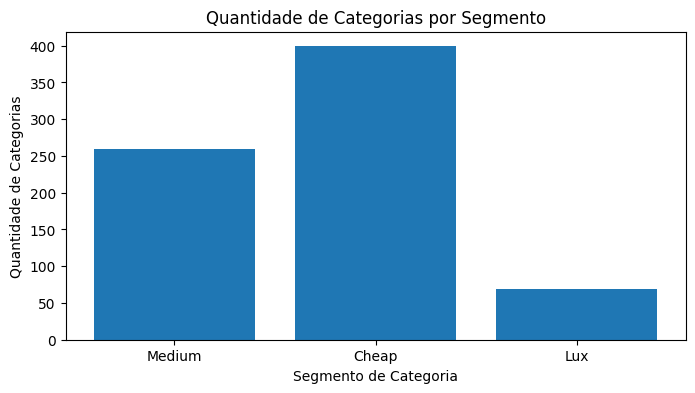

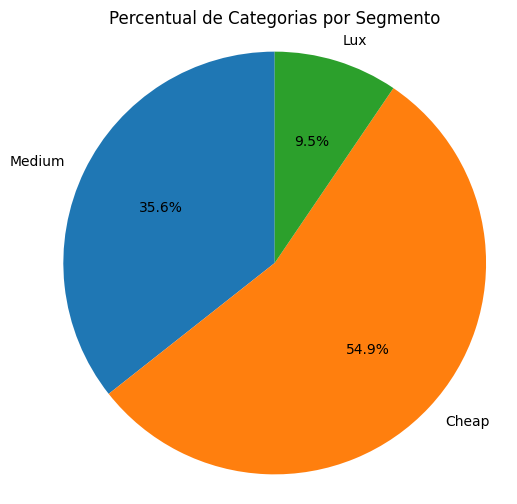

In [0]:
import matplotlib.pyplot as plt

df = spark.sql("""
    SELECT category_segment
    FROM mvp.gold_price_analysis.merchant_category_segmentation
""")

segment_counts = df.groupBy("category_segment").count().toPandas()
segment_counts["percent"] = segment_counts["count"] / segment_counts["count"].sum() * 100

plt.figure(figsize=(8,4))
plt.bar(segment_counts["category_segment"], segment_counts["count"])
plt.xlabel("Segmento de Categoria")
plt.ylabel("Quantidade de Categorias")
plt.title("Quantidade de Categorias por Segmento")
plt.show()

print()

plt.figure(figsize=(6,6))
plt.pie(segment_counts["count"], labels=segment_counts["category_segment"], autopct='%1.1f%%', startangle=90)
plt.title("Percentual de Categorias por Segmento")
plt.axis('equal')
plt.show()

maioria ds categorias se encontra em `cheap`, como esperado. Mesmo com a mioria dos vendedores estando em `lux` e `medium`, isso sugere que preciso rever a forma de calcular a categoria, ou que há vendedores de produtos `cheap` que tem muito mais produtos. É uma análise futura interessante.

### Oferta Cruzada (Vendedor x Marca)
#### Tabela que represente que o vendedor X fornece produtos de nível (cheap, medium, lux) da marca Y.

In [0]:
%sql
SELECT 
    merchant_name, 
    brand_name, 
    products_offered, -- Quantos produtos dessa marca esse vendedor tem
    offering_segment  -- O segmento de preço dessa parceria específica
FROM mvp.gold_price_analysis.merchant_brand_offering_segmentation
ORDER BY merchant_name, brand_name
limit 10;

merchant_name,brand_name,products_offered,offering_segment
ASICS BR,asics,1452,Lux
C&A BR,c&a,89413,Cheap
Camicado BR,ariete,30,Lux
Camicado BR,arno,3,Lux
Camicado BR,arthi,5,Cheap
Camicado BR,black+decker,11,Medium
Camicado BR,bohemia,26,Cheap
Camicado BR,brinox,6,Medium
Camicado BR,buddemeyer,3,Cheap
Camicado BR,cadence,12,Medium


A repsosta das duas últimas perguntas podem ser combinadas para sugerir mais análises futuras em busca de uma nova forma de segmentar a base. Encontrei uma ocorrência da marca `calvin klein` vendida como medium na loja `dafiti`, o que sugere que há necessidade de uma revisão.